In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import warnings
import random
%matplotlib inline

In [2]:
def KNN(dataset, predict, k=5):
    if len(dataset) >= k:
        warnings.warn("Error!! len(dataset) >= k")

    distances = []
    for group in dataset:
        for data in dataset[group]:
            euclid_dist = np.linalg.norm(np.array(data) - np.array(predict))
            distances.append([euclid_dist, group])

    predictions = []
    distances = sorted(distances)
    k_nearest_dist = distances[:k]
    for d in k_nearest_dist:
        predictions.append(d[1])

    prediction = Counter(predictions).most_common(1)[0][0]
    confidence = Counter(predictions).most_common(1)[0][1]/k
    return prediction, confidence

In [3]:
data_set = {'k': [[1, 2], [2, 3], [3, 1], [1, 4], [0, 3], [2, 4]],
            'r': [[6, 5], [7, 7], [8, 6], [10, 5], [8, 9]]}
test_set = [[5, 7], [10, 10], [2, 9]]

Featureset: [5, 7] | Prediction: r | Confidence: 0.8
Featureset: [10, 10] | Prediction: r | Confidence: 1.0
Featureset: [2, 9] | Prediction: k | Confidence: 0.6


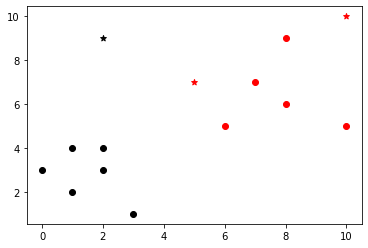

In [4]:
for group in data_set:
    for features in data_set[group]:
        plt.scatter(features[0], features[1], color=group)

for t in test_set:
    prediction, confidence = KNN(data_set, t)
    plt.scatter(t[0], t[1], marker="*", color=prediction)
    print(
        f"Featureset: {t} | Prediction: {prediction} | Confidence: {confidence}")

plt.show()